# Ames Housing Dataset

Credits to:
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard and
https://www.kaggle.com/laurenstc/top-2-of-leaderboard-advanced-fe

In [195]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import scipy
from scipy.stats import norm, skew
import math

##Settings
pd.options.display.max_rows = 30
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

In [196]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
df["LSalePrice"] = np.log(df["SalePrice"])
temp=df.columns.values.tolist()
temp.remove("SalePrice")
temp.remove("LSalePrice")
col=["SalePrice","LSalePrice"]+temp
df=df[col]

In [197]:
df.head()

,SalePrice,LSalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,208500.0000,12.2477,856,854,0,NaN,3,1Fam,TA,No,706.0000,0.0000,GLQ,Unf,1.0000,0.0000,Gd,150.0000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0000,2.0000,TA,RFn,TA,Attchd,2003.0000,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0000,Reg,0,60,RL,196.0000,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,856.0000,AllPub,0,2003,2003,2008
1,181500.0000,12.1090,1262,0,0,NaN,3,1Fam,TA,Gd,978.0000,0.0000,ALQ,Unf,0.0000,1.0000,Gd,284.0000,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0000,2.0000,TA,RFn,TA,Attchd,1976.0000,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0000,Reg,0,20,RL,0.0000,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1262.0000,AllPub,298,1976,1976,2007
2,223500.0000,12.3172,920,866,0,NaN,3,1Fam,TA,Mn,486.0000,0.0000,GLQ,Unf,1.0000,0.0000,Gd,434.0000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0000,2.0000,TA,RFn,TA,Attchd,2001.0000,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0000,IR1,0,60,RL,162.0000,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,920.0000,AllPub,0,2001,2002,2008
3,140000.0000,11.8494,961,756,0,NaN,3,1Fam,Gd,No,216.0000,0.0000,ALQ,Unf,1.0000,0.0000,TA,540.0000,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0000,3.0000,TA,Unf,TA,Detchd,1998.0000,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0000,IR1,0,70,RL,0.0000,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0000,AllPub,0,1915,1970,2006
4,250000.0000,12.4292,1145,1053,0,NaN,4,1Fam,TA,Av,655.0000,0.0000,GLQ,Unf,1.0000,0.0000,Gd,490.0000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0000,3.0000,TA,RFn,TA,Attchd,2000.0000,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0000,IR1,0,60,RL,350.0000,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,9,1145.0000,AllPub,192,2000,2000,2008


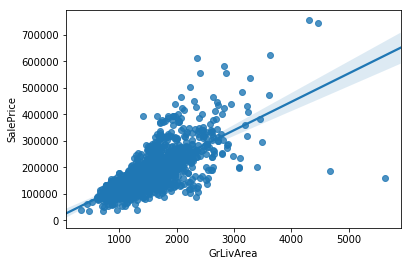

In [198]:
p=sns.regplot(x="GrLivArea",y="SalePrice",data=df)

In [199]:
df=df.drop(df.index[[1298,523]])

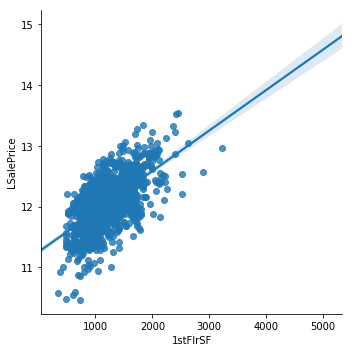

In [200]:
g=sns.lmplot(x="1stFlrSF",y="LSalePrice",data=df)

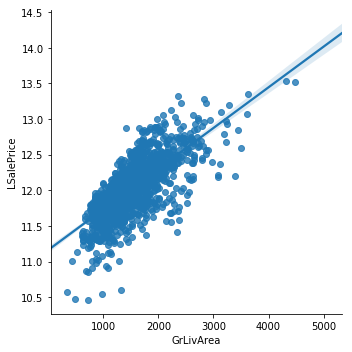

In [201]:
g=sns.lmplot(x="GrLivArea",y="LSalePrice",data=df)

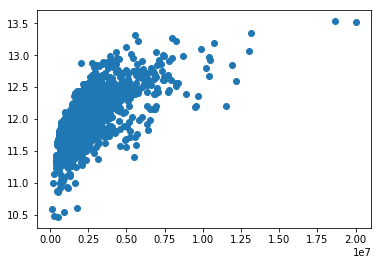

In [202]:
plt.scatter(np.array(df["GrLivArea"])**2,df["LSalePrice"])

In [203]:
del df["LSalePrice"]

### Check normality

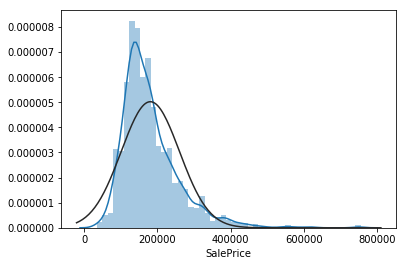

In [204]:
sns.distplot(train['SalePrice'],fit=norm)

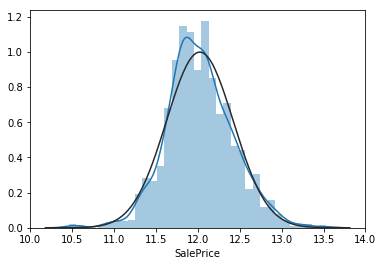

In [205]:
sns.distplot(np.log(train['SalePrice']),fit=norm)

### Filling missing values

In [206]:
aa=df.isnull().sum()
with pd.option_context('display.max_rows', 100, 'display.max_columns', 3):
    print(aa[aa>0].sort_values(ascending=False))

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
GarageCars         1
KitchenQual        1
SaleType           1
dtype: int64


In [207]:
del df["Utilities"]

In [208]:
df.groupby("Neighborhood").agg(["median","mean","count"])["LotFrontage"]

,median,mean,count
Neighborhood,,,
Blmngtn,43.0000,46.9000,20
Blueste,24.0000,27.3000,10
BrDale,21.0000,21.5000,30
BrkSide,51.0000,55.7895,95
ClearCr,80.5000,88.1500,20
CollgCr,70.0000,71.3364,220
Crawfor,70.0000,69.9518,83
Edwards,64.5000,65.1534,176
Gilbert,64.0000,74.2072,111


In [209]:
df["LotFrontage"]=df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [210]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["GarageYrBlt"].median())

In [211]:
for col in ("SaleType","MSZoning","KitchenQual","Functional","Exterior1st","Exterior2nd","Electrical",\
            "BsmtFullBath","BsmtHalfBath"):
    df[col].fillna(df[col].value_counts().idxmax(),inplace=True)

In [212]:
for col in ("BsmtFinSF1","BsmtFinSF2","TotalBsmtSF","BsmtUnfSF","MasVnrArea","GarageArea","GarageCars"):
    df[col].fillna(0,inplace=True)

In [213]:
for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond",\
            "BsmtFinType1","BsmtFinType2","BsmtQual","BsmtExposure","BsmtCond",\
            "MasVnrType","Alley","PoolQC","MiscFeature","Fence","FireplaceQu"):
    df[col].fillna("None",inplace=True)

In [214]:
df.isnull().sum()[df.isnull().sum()>0]

SalePrice    1459
dtype: int64

### Checking for incorrect data

In [215]:
df.describe()

,SalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,1458.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000,2917.0000
mean,180932.9191,1157.6925,335.8615,2.6040,2.8601,438.8649,49.5992,0.4289,0.0614,560.5036,23.1142,0.5962,1.5674,472.2475,1.7655,1978.1416,1498.2516,0.3798,1460.3761,1.0446,10139.4391,69.4361,4.6976,57.1358,100.9314,50.8608,6.2136,47.2801,5.5650,6.0864,2.0888,16.0734,6.4481,1048.9678,93.6294,1971.2880,1984.2482,2007.7929
std,79495.0553,385.2643,428.1197,25.1967,0.8230,444.1805,169.2321,0.5239,0.2457,439.6988,64.2634,0.6448,0.5525,214.7623,0.7621,24.8652,496.9086,0.5028,842.8925,0.2145,7807.0365,21.2082,46.4126,42.5321,178.0325,567.5952,2.7131,67.1190,1.1134,1.4067,34.5614,56.2021,1.5643,429.4720,126.5326,30.2870,20.8923,1.3153
min,34900.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1895.0000,334.0000,0.0000,1.0000,0.0000,1300.0000,21.0000,0.0000,20.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,2.0000,0.0000,0.0000,1872.0000,1950.0000,2006.0000
25%,129925.0000,876.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,220.0000,0.0000,0.0000,1.0000,320.0000,1.0000,1961.0000,1126.0000,0.0000,731.0000,1.0000,7476.0000,60.0000,0.0000,20.0000,0.0000,0.0000,4.0000,0.0000,5.0000,5.0000,0.0000,0.0000,5.0000,793.0000,0.0000,1953.0000,1965.0000,2007.0000
50%,163000.0000,1082.0000,0.0000,0.0000,3.0000,368.0000,0.0000,0.0000,0.0000,467.0000,0.0000,1.0000,2.0000,480.0000,2.0000,1979.0000,1444.0000,0.0000,1461.0000,1.0000,9452.0000,70.0000,0.0000,50.0000,0.0000,0.0000,6.0000,26.0000,5.0000,6.0000,0.0000,0.0000,6.0000,988.0000,0.0000,1973.0000,1993.0000,2008.0000
75%,214000.0000,1384.0000,704.0000,0.0000,3.0000,733.0000,0.0000,1.0000,0.0000,804.0000,0.0000,1.0000,2.0000,576.0000,2.0000,2001.0000,1743.0000,1.0000,2190.0000,1.0000,11556.0000,80.0000,0.0000,70.0000,163.0000,0.0000,8.0000,70.0000,6.0000,7.0000,0.0000,0.0000,7.0000,1302.0000,168.0000,2001.0000,2004.0000,2009.0000
max,755000.0000,5095.0000,2065.0000,508.0000,8.0000,4010.0000,1526.0000,3.0000,2.0000,2336.0000,1012.0000,4.0000,4.0000,1488.0000,5.0000,2207.0000,5095.0000,2.0000,2919.0000,3.0000,215245.0000,313.0000,1064.0000,190.0000,1600.0000,17000.0000,12.0000,742.0000,9.0000,10.0000,800.0000,576.0000,15.0000,5095.0000,1424.0000,2010.0000,2010.0000,2010.0000


In [216]:
df.loc[df["GarageYrBlt"]==2207,"GarageYrBlt"]=2007

### Numerical to categorical 

In [217]:
df["MoSold"]=df["MoSold"].astype(str)
df["YrSold"]=df["YrSold"].astype(str)
df["MSSubClass"]=df["MSSubClass"].astype(str)

### Correcting skew

In [225]:
from scipy.stats import skew

In [226]:
columns=df.columns.values

In [227]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = df[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews

,skew
MiscVal,21.9397
PoolArea,17.6887
pool,15.4948
LotArea,13.1095
LowQualFinSF,12.0845
3SsnPorch,11.3721
1stFl2,5.3340
KitchenAbvGr,4.3006
BsmtFinSF2,4.1445
EnclosedPorch,4.0023


In [228]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [229]:
high_skew=skew_features[skew_features>1]

In [230]:
index=high_skew.index

In [231]:
df_norm=df.copy()

In [232]:
for i in index:
    df_norm[i]=boxcox1p(df[i],boxcox_normmax(df[i]+1))

In [233]:
skew_features = df_norm[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews

,skew
PoolArea,15.5951
pool,15.4948
3SsnPorch,8.8620
LowQualFinSF,8.4926
MiscVal,5.2380
BsmtHalfBath,3.7794
KitchenAbvGr,3.7783
ScreenPorch,3.1526
BsmtFinSF2,2.5783
Remod1950,2.2851


### Feature engineering

In [218]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [220]:
df["Bathroom"]= df["BsmtFullBath"] + 0.5 * df["BsmtHalfBath"] + 0.5 * df["HalfBath"] + df["FullBath"]

In [222]:
df["Remod1950"]=[1 if i==1950 else 0 for i in df["YearRemodAdd"]]

### Model

In [235]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, cross_val_score
from sklearn.base import clone, BaseEstimator

##Regressors
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [281]:
df_dummies=pd.get_dummies(data=df_norm)
train_dummies=df_dummies[:1458]
test_dummies=df_dummies[1458:]
X=train_dummies.drop(columns="SalePrice")
y=train_dummies["SalePrice"].values
X_test=test_dummies.drop(columns="SalePrice")
print("X shape: %d x %d." % (X.shape[0],X.shape[1]))
print("Length y: %d" % (len(y)))
print("X_test shape: %d x %d." % (X_test.shape[0],X_test.shape[1]))

X shape: 1458 x 337.
Length y: 1458
X_test shape: 1459 x 337.


### Outliers

In [138]:
import statsmodels.api as sm

In [139]:
X.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,TotalSF,RemodAdd,Bathroom,pool,Remod1950,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,5.9390,854,0.0000,3,706.0000,0.0000,1.0000,0.0000,150.0000,0.0000,0,2,548.0000,2.0000,2003.0000,8.3535,1,1,0.7510,13.8331,18.1446,0.0000,19.4332,0.0000,12.0803,5,7,0.0000,0.0000,8,856.0000,0.0000,2003,2003,35.5762,0,3.5000,0.0000,0.0000,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1,6.2350,0,0.0000,3,978.0000,0.0000,0.0000,0.7109,284.0000,0.0000,1,2,460.0000,2.0000,1976.0000,7.9747,0,2,0.7510,14.1179,20.6736,0.0000,0.0000,0.0000,0.0000,8,6,0.0000,0.0000,6,1262.0000,56.1842,1976,1976,35.3719,0,2.5000,0.0000,0.0000,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2,5.9943,866,0.0000,3,486.0000,0.0000,1.0000,0.0000,434.0000,0.0000,1,2,608.0000,2.0000,2001.0000,8.4081,1,3,0.7510,14.4765,18.6680,0.0000,17.7688,0.0000,9.9011,5,7,0.0000,0.0000,6,920.0000,0.0000,2001,2002,36.2411,1,3.5000,0.0000,0.0000,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,6.0277,756,0.0000,3,216.0000,0.0000,1.0000,0.0000,540.0000,16.0207,1,1,642.0000,3.0000,1998.0000,8.3587,0,4,0.7510,14.1062,17.2497,0.0000,0.0000,0.0000,8.9661,5,7,0.0000,0.0000,7,756.0000,0.0000,1915,1970,35.1207,1,2.0000,0.0000,0.0000,0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
4,6.1612,1053,0.0000,4,655.0000,0.0000,1.0000,0.0000,490.0000,0.0000,1,2,836.0000,3.0000,2000.0000,8.6693,1,5,0.7510,15.0220,21.3143,0.0000,25.4042,0.0000,14.2716,5,8,0.0000,0.0000,9,1145.0000,42.2457,2000,2000,39.0023,0,3.5000,0.0000,0.0000,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [80]:
ols = sm.OLS(np.log(y), np.array(X)).fit()
pred=ols.predict()
test=ols.outlier_test()
test2=pd.DataFrame(test)
outliers=test2[abs(test2[0])>6].index

In [303]:
outliers

Int64Index([462, 631, 1322], dtype='int64')

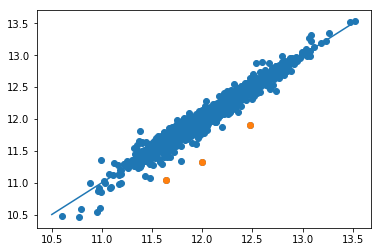

In [85]:
plt.scatter(pred,np.log(y))
plt.scatter(np.array([pred[i] for i in outliers]),np.array([np.log(y[i]) for i in outliers]))
plt.plot([10.5,13.5],[10.5,13.5])
plt.show()

In [304]:
X = X.drop(X.index[outliers])
y = np.delete(y,outliers)

### Preprocessing

In [237]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [315]:
model=make_pipeline(RobustScaler(),Lasso(alpha=0.0005)).fit(X=X,y=np.log(y))

In [316]:
kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train.values)

In [317]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, np.log(y), 
                                   scoring="neg_mean_squared_error", 
                                   cv = kf))
    return(rmse)

In [318]:
cv_rmse(model).mean()

0.10367953921017595

In [284]:
coef=model.steps[1][1].coef_
df_l=pd.DataFrame({"Name":X.columns.values,"Coef":coef})
df_l.set_index("Name",inplace=True)

In [333]:
df_l.loc["Bathroom"]

Coef   0.0123
Name: Bathroom, dtype: float64

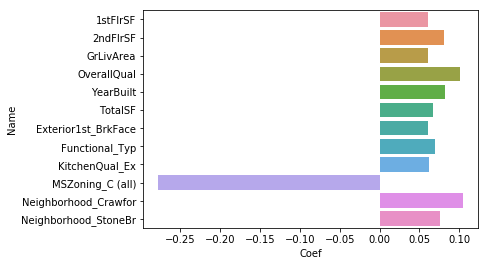

In [278]:
sns.barplot(y="Name",x="Coef",data=df_l[abs(df_l["Coef"])>0.05])

In [243]:
model2=make_pipeline(RobustScaler(),Ridge(alpha=10)).fit(X=X,y=y)

In [306]:
cv_rmse(model2).mean()

0.10712700308556364

### Cross validation

In [319]:
def root_mean_squared_error(truth,predictions):
    return np.sqrt(sum((truth-predictions) ** 2)/len(truth))
rmse_scorer=make_scorer(root_mean_squared_error,greater_is_better=False)

In [338]:
regr=[LinearRegression(),Lasso(alpha=0.0005),Ridge(alpha=10),XGBRegressor(max_depth=3),\
      RandomForestRegressor(max_depth=25,n_estimators=60)]
regr=[LinearRegression(),Lasso(alpha=0.0005),Ridge(alpha=10),ElasticNet(alpha=0.001),\
      KernelRidge(),XGBRegressor(n_estimators=3460,max_depth=3)]
#regr=[LinearRegression(),Lasso(alpha=0.0005),Ridge(alpha=10),ElasticNet(alpha=0.001),\
#      KernelRidge()]

In [339]:
kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train.values)

In [340]:
def cross_validation(regr=regr,X_train=X,y_train=np.log(y),scoring=rmse_scorer,cv=kf):
    names=[]
    mean_test_scores=[]
    test_stds=[]
    mean_train_scores=[]
    train_stds=[]
    outcomes={}
    
    for r in regr:
        name=r.__class__.__name__
        names.append(name)
        
        outcomes[name]=cross_validate(r,RobustScaler().fit_transform(X_train),y_train,scoring=scoring,cv=cv)
        
        mean_test_scores.append(-outcomes[name]["test_score"].mean())
        test_stds.append(outcomes[name]["test_score"].std())
        mean_train_scores.append(-outcomes[name]["train_score"].mean())
        train_stds.append(outcomes[name]["train_score"].std())
        
        r.fit(X_train,y_train)
        
    
    
    regr_results=pd.DataFrame({"Regressor":names,"Mean train score":mean_train_scores,\
                               "Train std":train_stds,"Mean test score":mean_test_scores,\
                                "test_std":test_stds},index=np.arange(len(names)))
    display(regr_results)
    
    return outcomes

In [341]:
outcomes=cross_validation()

,Regressor,Mean train score,Train std,Mean test score,test_std
0,LinearRegression,0.0783,0.0006,347295867.9176,352672966.4777
1,Lasso,0.0904,0.0009,0.1037,0.0036
2,Ridge,0.0865,0.0008,0.1071,0.0038
3,ElasticNet,0.0908,0.0009,0.1039,0.0036
4,KernelRidge,0.1037,0.0012,0.1546,0.0125
5,XGBRegressor,0.0019,0.0001,0.1109,0.0034


### Parameter tuning

In [323]:
lasso=[Lasso(alpha=0.0001),Lasso(alpha=0.0005),Lasso(alpha=0.001),Lasso(alpha=0.005),Lasso(alpha=0.01)]

In [324]:
outcomes=cross_validation(regr=lasso)

,Regressor,Mean train score,Train std,Mean test score,test_std
0,Lasso,0.0820,0.0007,0.1091,0.0041
1,Lasso,0.0905,0.0009,0.1043,0.0039
2,Lasso,0.0968,0.0009,0.1064,0.0040
3,Lasso,0.1190,0.0010,0.1226,0.0036
4,Lasso,0.1235,0.0010,0.1261,0.0026


In [297]:
ridge=[Ridge(alpha=0.1),Ridge(alpha=1),Ridge(alpha=5),Ridge(alpha=10),Ridge(alpha=15),Ridge(alpha=20),Ridge(alpha=100)]

In [298]:
outcomes=cross_validation(regr=ridge)

,Regressor,Mean train score,Train std,Mean test score,test_std
0,Ridge,0.0839,0.0016,0.1192,0.0092
1,Ridge,0.0850,0.0016,0.1142,0.0080
2,Ridge,0.0883,0.0017,0.1106,0.0072
3,Ridge,0.0910,0.0016,0.1102,0.0069
4,Ridge,0.0931,0.0016,0.1104,0.0068
5,Ridge,0.0947,0.0016,0.1108,0.0068
6,Ridge,0.1060,0.0016,0.1160,0.0065


In [320]:
elastic=[ElasticNet(alpha=0.0001),ElasticNet(alpha=0.0005),ElasticNet(alpha=0.001),ElasticNet(alpha=0.01),ElasticNet(alpha=0.1)]

In [321]:
outcomes=cross_validation(regr=elastic)

,Regressor,Mean train score,Train std,Mean test score,test_std
0,ElasticNet,0.0851,0.0016,0.1146,0.0076
1,ElasticNet,0.0898,0.0017,0.1083,0.0076
2,ElasticNet,0.0943,0.0018,0.1075,0.0074
3,ElasticNet,0.1242,0.0018,0.1286,0.0058
4,ElasticNet,0.1586,0.0010,0.1613,0.0035


In [322]:
e_par={"alpha":[0.0001,0.0004,0.001,0.01,0.1],"l1_ratio":[0.1,0.5,0.8,0.9,0.95,0.99]}

In [323]:
e_reg=GridSearchCV(ElasticNet(),e_par,scoring=rmse_scorer,cv=kf)
_=e_reg.fit(X,np.log(y))
print(e_reg.best_score_)
e_reg.best_params_

-0.10731088736511742


{'alpha': 0.0004, 'l1_ratio': 0.99}

In [483]:
xgb_parameters={"gamma":[0],"max_depth":[2,3,5]}
xgb_reg=GridSearchCV(XGBRegressor(),xgb_parameters,scoring=rmse_scorer,cv=kf)
_=xgb_reg.fit(X,np.log(y))
print(xgb_reg.best_score_)
xgb_reg.best_params_

-0.010788112830310777


{'gamma': 0, 'max_depth': 3}

In [484]:
rf_parameters={"max_depth":[15,25,35],"n_estimators":[40,60,80]}
rf_reg=GridSearchCV(RandomForestRegressor(random_state=42),rf_parameters,scoring=rmse_scorer,cv=kf)
_=rf_reg.fit(X,np.log(y))
print(rf_reg.best_score_)
rf_reg.best_params_

-0.012076477791814984


{'max_depth': 15, 'n_estimators': 60}

### Ensemble method

In [326]:
class AverageModels(BaseEstimator):
    def __init__(self, models):
        self.models=models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for m in self.models_:
            m.fit(X,y)
    
    def predict(self, X):
        predictions = np.column_stack(m.predict(X) for m in self.models_)
        return np.mean(predictions, axis=1)

In [329]:
r=AverageModels(regr[1:4])

In [330]:
cross_val_score(r,X,np.log(y),scoring=rmse_scorer,cv=kf).mean()

-0.10490030042120213

### Outcome

In [324]:
r=Lasso(alpha=0.0005)

In [325]:
r.fit(X,np.log(y))

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [326]:
pred_test=r.predict(X_test)

In [327]:
final=np.e ** pred_test

In [328]:
submission=pd.DataFrame({"Id":np.arange(1461,2920),"SalePrice":final})

In [330]:
submission.to_csv("Submission6.csv",index=False)

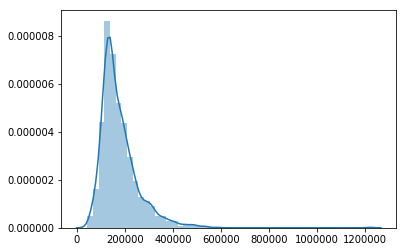

In [239]:
sns.distplot(final)